## Import libraries and packages

In [61]:
import os
import urllib.request
import csv
import pandas as pd 
import json
import seaborn as sns
import numpy as np

### Task 1: Identify one or more suitable web APIs
<span style="color:red">***API Chosen:***</span>

A single API that was chosen was that provided by http://www.theaudiodb.com/
<br><br>
Specifically, the Search album history for artist API - http://www.theaudiodb.com/api/v1/json/1/searchalbum.php?s=coldplay
<br>
The API is freely available and requires no sign up.<br><br>
If you want to test the API or are only using it for a personal project you can use the Test API key "1". It suggests not to use this in a production environment with multiple users though.

In [62]:
api_key = "1"
base_url = "http://www.theaudiodb.com/api/v1/json/"
album_url = "/searchalbum.php?s="

### Task 2: Collect data from your chosen API(s)

<span style="color:red">***Collecting Raw Data - Functions needed:***</span><br><br>
The following 3 functions were written to allow multiple calls of the API as only limited data is available per call.<br><br>
These function are commented throughout and are called below:

In [63]:
#create a file with set headings
def create_file (file_loc, headings): 
    with open(file_loc, "w",newline='') as write_file:
        f = csv.writer(write_file)
        f.writerow(headings)
    write_file.close()
    
#function to call the API, retreive the raw csv data, and write to a file
def get_and_write_data(link, file_loc): 
    response = urllib.request.urlopen(link)
    html = response.read().decode()
    data = json.loads(html)
    with open(file_loc, "a",newline='') as write_file: #open the file / create it, newline ='' to prevent blank lines being written 
        f = csv.writer(write_file)
        lines = html.strip().split("\n")
        for key in data['album']:
            # Write the appropriate columns of a row based on API response values
            l = [key["idAlbum"], key["strAlbum"], key["strArtist"], key["intYearReleased"],\
                 key["strStyle"],key["strGenre"] ,key["strLabel"], key["strReleaseFormat"],  key["intSales"], \
                 key["intLoved"], key["intScore"], key["intScoreVotes"], key["strReview"], key["strMood"], key["strSpeed"]]
            f.writerow(l)
    write_file.close()

    
def get_raw_data(file_loc, artist_names):
    # API request called here with the corresponding artist names
    for name in artist_names:
        url = base_url + api_key  + album_url + name
        get_and_write_data(url, file_loc)

### Task 3: Parse the collected data, and store it in an appropriate file format

<span style="color:red">***Collecting Raw Data and writing raw data to CSV:***</span><br><br>

The following code retreives the raw data using the above Functions from the API and writes it to a CSV file.<br><br>
This data needs extensive cleaning and manipulation before it can be used.

In [64]:
raw_file_loc = "artist.csv"
# Create new file, and store the headeres
create_file (raw_file_loc, ["idAlbum", "strAlbum", "strArtist", "intYearReleased", "strStyle",\
                            "strGenre", "strLabel", "strReleaseFormat", "intSales", "intLoved", "intScore", "intScoreVotes","strReview", "strMood", "strSpeed"])

# List of 16 artists for which API end-point is called
artist_names = ["coldplay", "Ed_Sheeran", "Taylor_Swift", "Justin_Bieber", "Eminem", "Linkin_Park","Backstreet_Boys", "Jennifer_Lopez",\
                "The_Beatles", "Michael_Jackson", "Rihanna", "Adele", "Slipknot", "Madonna", "Queen", "Oasis"]
get_raw_data(raw_file_loc, artist_names)
print("Raw Data Collection Completed \n")

Raw Data Collection Completed 



### Task 4: Load and represent the data using an appropriate data structure. Apply any pre-processing steps to clean/filter/combine the data

<span style="color:red">***Parsing Raw Data:***</span><br><br>


The raw data returns lines of album for each artist, corresponding to the list of artists we used while triggering the API call.<br><br>



In [65]:
df = pd.read_csv(raw_file_loc, index_col="idAlbum") #idAlbum is taken as the index column instead of generic Indexing
print("Shape of original dataframe is ", df.shape)
df

Shape of original dataframe is  (288, 14)


,strAlbum,strArtist,intYearReleased,strStyle,strGenre,strLabel,strReleaseFormat,intSales,intLoved,intScore,intScoreVotes,strReview,strMood,strSpeed
idAlbum,,,,,,,,,,,,,,
2109614,A Rush of Blood to the Head,Coldplay,2002,Rock/Pop,Pop-Rock,Parlophone,Album,15000000,2.0,8.4,7.0,"Perhaps unsurprisingly, Coldplay's new album A...",Relaxed,Medium
2109615,Parachutes,Coldplay,2000,Rock/Pop,Pop-Rock,Parlophone,Album,8500000,2.0,8.1,7.0,NaN,Relaxed,Slow
2109616,Mylo Xyloto,Coldplay,2011,Rock/Pop,Pop-Rock,Parlophone,Album,8000000,1.0,7.8,8.0,Don’t Coldplay love their Xs and their Ys? And...,Relaxed,Medium
2109617,Viva la Vida or Death and All His Friends,Coldplay,2008,Rock/Pop,Pop-Rock,Atlantic,Album,10000000,NaN,7.2,5.0,Paradoxically everything that fuels cynicism a...,Relaxed,Medium
2109618,X&Y,Coldplay,2005,Rock/Pop,Pop-Rock,Parlophone,Album,12000000,3.0,8.4,8.0,"You've heard the single, read the reviews and ...",Relaxed,Medium
2114546,Live 2003,Coldplay,2003,Rock/Pop,Pop-Rock,Parlophone,VideoAlbum,0,NaN,8.0,1.0,NaN,Relaxed,Medium
2143695,The Blue Room E.P.,Coldplay,1999,Rock/Pop,Pop-Rock,Parlophone,EP,0,NaN,3.0,2.0,NaN,Relaxed,Slow
2143696,Acoustic,Coldplay,2000,Rock/Pop,Pop-Rock,Parlophone,EP,0,NaN,NaN,NaN,NaN,Relaxed,Slow
2143698,Prospekt's March EP,Coldplay,2008,Rock/Pop,Pop-Rock,Parlophone,EP,0,NaN,6.0,2.0,NaN,Relaxed,Medium


<span style="color:red">***Utilising Pandas and further Data Modification***</span><br><br>

With the CSV files written these are imported using Pandas.<br><br>
Few important columns were chosen for analysis, like intYearReleased, strGenre, strReleaseFormat, intSales, intScore, strMood.


In [66]:
df.describe()

,intYearReleased,intSales,intLoved,intScore,intScoreVotes
count,288.000000,2.880000e+02,30.000000,169.000000,169.000000
mean,1959.493056,3.453387e+06,1.866667,7.659172,2.798817
std,286.634831,8.129194e+06,1.833281,1.412294,2.037096
min,0.000000,0.000000e+00,1.000000,2.000000,1.000000
25%,1995.750000,0.000000e+00,1.000000,7.000000,1.000000
50%,2005.000000,0.000000e+00,1.000000,7.800000,2.000000
75%,2011.000000,2.000000e+06,2.000000,8.500000,4.000000
max,2017.000000,6.500000e+07,9.000000,10.000000,13.000000


In [67]:
df.mean()

intYearReleased    1.959493e+03
intSales           3.453387e+06
intLoved           1.866667e+00
intScore           7.659172e+00
intScoreVotes      2.798817e+00
dtype: float64

<span style="color:red">***Missing Data***</span><br><br>

Pre-Processing steps are to look for missing data to see if further pre-processing is needed.<br><br>
Drop unnecessary columns which has lot of missing values.<br><br>
Replace numeric features with mean/median and categorical features with mode.

In [68]:
#Pre-processing using Pandas
print(df.isnull().sum())
df.drop('strReview', axis=1, inplace=True) #Since strReview has > 50% missing values, we drop that column
df.replace("...",np.nan, inplace=True) # replace ... values in the data with NaN
df['strGenre'].fillna(df['strGenre'].mode(), inplace=True) # Fill missing strGenre values with mode of that column 

# Replacing intYearReleased of 0 values to the mode of intYearReleased
mode = df['intYearReleased'].mode()
df['intYearReleased'].replace(0, mode[0], inplace=True)

strAlbum              0
strArtist             0
intYearReleased       0
strStyle              1
strGenre              0
strLabel            175
strReleaseFormat      1
intSales              0
intLoved            258
intScore            119
intScoreVotes       119
strReview           235
strMood              25
strSpeed            155
dtype: int64


In [69]:
df

,strAlbum,strArtist,intYearReleased,strStyle,strGenre,strLabel,strReleaseFormat,intSales,intLoved,intScore,intScoreVotes,strMood,strSpeed
idAlbum,,,,,,,,,,,,,
2109614,A Rush of Blood to the Head,Coldplay,2002,Rock/Pop,Pop-Rock,Parlophone,Album,15000000,2.0,8.4,7.0,Relaxed,Medium
2109615,Parachutes,Coldplay,2000,Rock/Pop,Pop-Rock,Parlophone,Album,8500000,2.0,8.1,7.0,Relaxed,Slow
2109616,Mylo Xyloto,Coldplay,2011,Rock/Pop,Pop-Rock,Parlophone,Album,8000000,1.0,7.8,8.0,Relaxed,Medium
2109617,Viva la Vida or Death and All His Friends,Coldplay,2008,Rock/Pop,Pop-Rock,Atlantic,Album,10000000,NaN,7.2,5.0,Relaxed,Medium
2109618,X&Y,Coldplay,2005,Rock/Pop,Pop-Rock,Parlophone,Album,12000000,3.0,8.4,8.0,Relaxed,Medium
2114546,Live 2003,Coldplay,2003,Rock/Pop,Pop-Rock,Parlophone,VideoAlbum,0,NaN,8.0,1.0,Relaxed,Medium
2143695,The Blue Room E.P.,Coldplay,1999,Rock/Pop,Pop-Rock,Parlophone,EP,0,NaN,3.0,2.0,Relaxed,Slow
2143696,Acoustic,Coldplay,2000,Rock/Pop,Pop-Rock,Parlophone,EP,0,NaN,NaN,NaN,Relaxed,Slow
2143698,Prospekt's March EP,Coldplay,2008,Rock/Pop,Pop-Rock,Parlophone,EP,0,NaN,6.0,2.0,Relaxed,Medium


In [70]:
# Checking null values in the numeric features
simplified_data = df[["strArtist", "intYearReleased", "strGenre", "intSales", "intScore"]]
simplified_data = simplified_data.sort_values(by=['intYearReleased'])
print("Total number of rows:\n", simplified_data.astype(bool).sum(axis=0))
print("Total number of null values in columns:\n", simplified_data.isnull().sum())

Total number of rows:
 strArtist          288
intYearReleased    288
strGenre           288
intSales            93
intScore           288
dtype: int64
Total number of null values in columns:
 strArtist            0
intYearReleased      0
strGenre            14
intSales             0
intScore           119
dtype: int64


<br><br> **Null values**<br><br>
There's still Null's in the data for some important numeric features which we required for data analysis. These include mainly intScore and intScoreVotes which we will frequently use later.<br><br>

We plot a Kernel Density Estimate (KDE) plot for each artist after using Pandas' GroupBy to see what is the distribution of intScore for each artist. <br><br>
Based on the plot, we can conclude if the curve is centered near a value and has less standard deviation, then we can replace missing values by its mean.<br><br>
On the other hand, if the distribution is very skewed, median should be chosen to replace missing values.


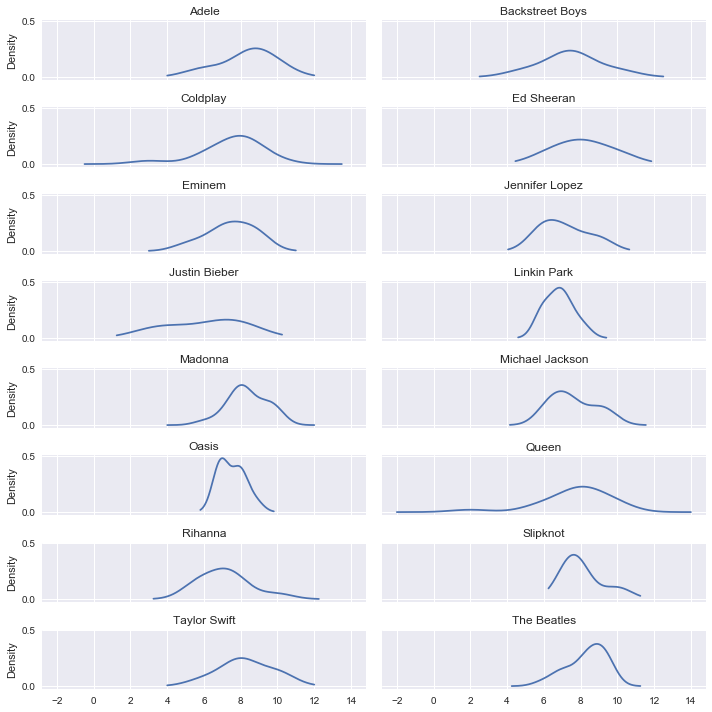

In [71]:
# Plotting the Kernel Density Estimate plot for each artist's intScore

g = df.groupby('strArtist').intScore
n = g.ngroups
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(n // 2, 2, figsize=(10, 10), sharex=True, sharey=True)
for i, (name, group) in enumerate(g):
    r, c = i // 2, i % 2
    group.plot.kde(title=name, ax=axes[r, c])
fig.tight_layout()

# We realise that most of the artist's intScores follow a KDE distribution
# So we replace the missing values of intScore by its mean of intScore for that particular artist

# Similarly we replace the missing values of intScoreVotes by its mean of intScoreVotes for that particular artist

df['intScoreVotes'] = df.groupby('strArtist')['intScoreVotes'].transform(lambda x: x.fillna(round(x.mean(), 2)))

df['intScore'] = df.groupby('strArtist')['intScore'].transform(lambda x: x.fillna(round(x.mean(), 2)))

## Task 5: Analyse and summarise the cleaned dataset


<span style="color:red">***Descriptive Statistics***</span><br><br>

Initially of the Data Set containing all data:

In [72]:
# Checking the description of reduced dataframe
print("\nSimplified_data columnns:\n" + str(simplified_data.columns) + "\n")
print("Simplified_data Descriptive Stats:\n")
print(simplified_data.describe())


Simplified_data columnns:
Index(['strArtist', 'intYearReleased', 'strGenre', 'intSales', 'intScore'], dtype='object')

Simplified_data Descriptive Stats:

       intYearReleased      intSales    intScore
count       288.000000  2.880000e+02  169.000000
mean       2001.347222  3.453387e+06    7.659172
std          13.499423  8.129194e+06    1.412294
min        1963.000000  0.000000e+00    2.000000
25%        1996.000000  0.000000e+00    7.000000
50%        2006.000000  0.000000e+00    7.800000
75%        2011.000000  2.000000e+06    8.500000
max        2017.000000  6.500000e+07   10.000000


<span style="color:red">***Matplotlib and Pandas Graphing***</span><br><br>


In [73]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

### Line Graphs , Bar graph, Pie Chart


A table that shows average score for each artist across entire dataset

In [74]:
mean_rating_artist = df.groupby(['strArtist']).agg('mean')["intScore"]
mean_rating_artist.reset_index()

,strArtist,intScore
0,Adele,8.360000
1,Backstreet Boys,7.468333
2,Coldplay,7.470800
3,Ed Sheeran,8.100000
4,Eminem,7.450000
5,Jennifer Lopez,7.110588
6,Justin Bieber,6.032000
7,Linkin Park,6.820000
8,Madonna,8.356000
9,Michael Jackson,7.578400


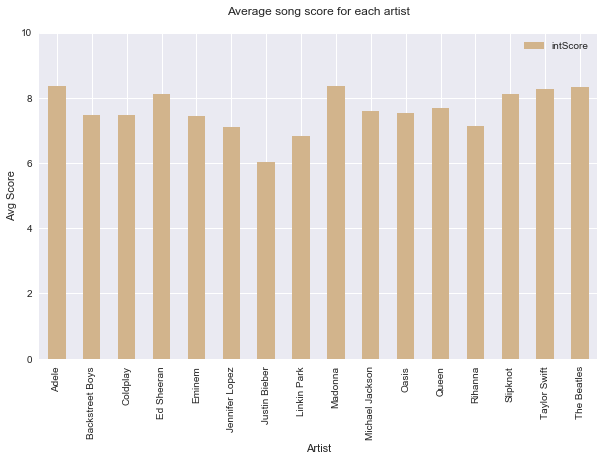

In [75]:
# Plotting a bar graph from the dataframe that contains artistNames with average intScore
plt.figure()
mean_rating_artist.plot(kind = 'bar', figsize=(10,6), color="tan" )
plt.title("Average song score for each artist\n")
axes = plt.gca()
axes.set_ylim([0,10])
plt.ylabel("Avg Score")
plt.xlabel("Artist")
plt.legend(numpoints=1)
plt.show()

We interpret that Adele (8.36) has highest average intScore among all artists with The Beatles alomost competing them with 8.32, whereas Justin Bieber has the lowest. Most of the mean intScore lie in the range (6,9).

Table to display count of albums for each type of Genre

In [76]:
# Taking value counts for each type of strGenre
genre_series = df['strGenre'].value_counts()
genre_series.reset_index()

,index,strGenre
0,Pop,115
1,Rock,25
2,Rock & Roll,25
3,Hip-Hop,25
4,Indie,17
5,Metal,17
6,Pop-Rock,14
7,Alternative Rock,10
8,Soul,9
9,Nu Metal,9


Pie Chart to display the same in a proportion format

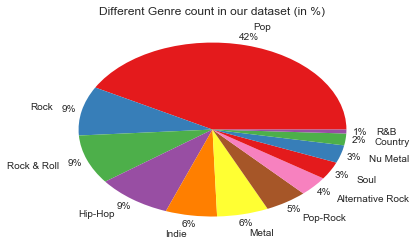

In [77]:
#Plotting a Pie chart from dataframe that contains different strGenre and their counts
genres = genre_series.index.tolist()
genre_count = genre_series.values.tolist()
plt.figure()
myColors=cm.Set1(np.arange(8)/8) # Generate 8 different colors from matplotlib colormap
# Extra parameters inside the plt.pie() for proper labelling in the Pie chart
p = plt.pie(genre_count, labels=genres, colors=myColors, autopct='%.0f%%', pctdistance=1.1, labeldistance=1.22)
plt.title("Different Genre count in our dataset (in %)")

We deduce that Pop is the most famous Music Genre with almost 42% (nearly half the total) of songs being Pop songs.

Displays the total sales of all albums for each artist in the form of a horizontal bar chart

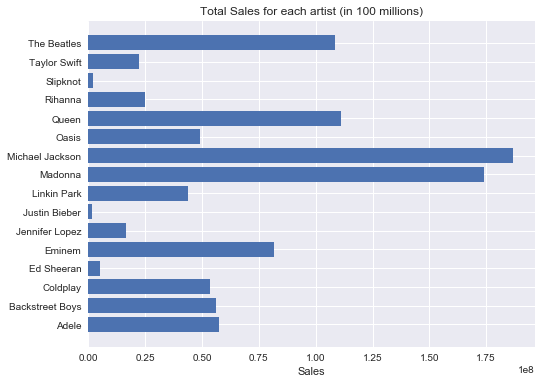

In [78]:
# Group by artist and then sum the intSales to get the total sales for each artist
sales_series = df.groupby(['strArtist']).sum()['intSales']

sales = sales_series.index.tolist()
y_pos = [i for i in range(len(sales))]
sales_count = sales_series.values.tolist()
plt.figure(figsize=(8,6))
plt.barh(y_pos, sales_count, align='center') #Horizontal bar plot using the extracted dataframe
plt.yticks(y_pos, sales)
plt.xlabel("Sales")
plt.title("Total Sales for each artist (in 100 millions)")

We realise that Michael Jackson leads the way by a long margin in terms of Sales and his album sales stands almost double than other famous artists like The Beatles or Eminem.

Line graph to compare the Score Votes (of each song) for different categories of Song Speed

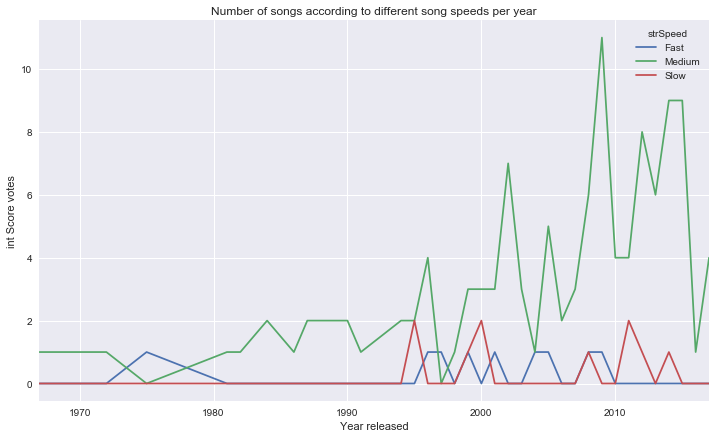

In [79]:
# Plot year by year intScoreVotes for each type of strSpeed as a line graph 
# There are 3 dimensions in the below plot - X axis for Year, Y axis for Score and Colors for Speed of song

fig, ax = plt.subplots(figsize=(12,7))
# We replace the NaN values if any found with 0 (NaN values might be present corresponding to a particular year with particular song speed)
df.groupby(['intYearReleased','strSpeed']).count()['intScoreVotes'].unstack(level=-1, fill_value=0).plot(ax=ax)
plt.title("Number of songs according to different song speeds per year")
ax.set_xlabel('Year released')
ax.set_ylabel('int Score votes')

We infer that as the years progressed, the Score for categories of songs (irrespective of speed) kept increasing. Medium speed songs became most famous with highest score in recent years. Slow songs have degraded and their score has faded down in recent years.

### Table showing most popular artist per year

In [80]:
# Listing the top artist for each year based on the count of albums released 
a = pd.DataFrame({'count' : df.groupby( [ "intYearReleased", "strArtist"] ).size()}).reset_index()
b = a.loc[a.groupby('intYearReleased')['count'].idxmax()]

c = b.set_index("intYearReleased")
c.columns = ['Artist Name', 'Number of albums']
print("-----------------------TOP artist year wise (since 2000)---------------")
c.tail(17)

-----------------------TOP artist year wise (since 2000)---------------


,Artist Name,Number of albums
intYearReleased,,
2001,Backstreet Boys,1
2002,Jennifer Lopez,3
2003,Eminem,3
2004,Eminem,1
2005,Backstreet Boys,1
2006,Eminem,1
2007,Jennifer Lopez,3
2008,Coldplay,3
2009,Coldplay,5


We gather that every year the most famous artist releases around 2-3 albums, and we have continous new artist arrivals in the music industry as the years are passing.

### Scatter Plot

Displays scatter plot of Score and ScoreVotes

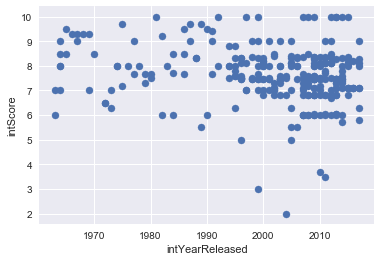

In [81]:
# Scatter plot of year vs score
df.plot.scatter(x="intYearReleased", y="intScore", s=50 )

Scatter matrix plot among all numeric features present in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122e4ba90>,
      dtype=object)

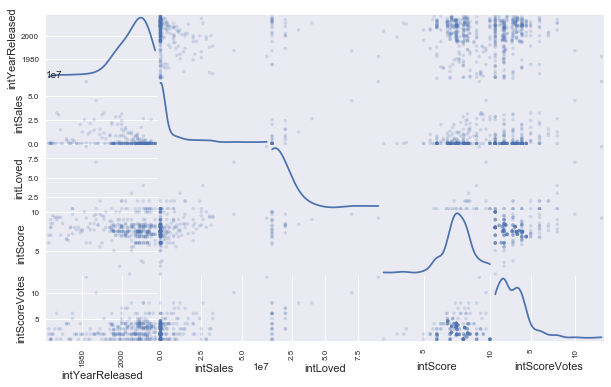

In [82]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 6), diagonal='kde')

### Subplot

Compare the median Score and mean ScoreVote for every grouped year using a subplot

In [83]:
# Filtered dataset containing songs only with year released between 2000 to 2017
filtered_year_df = df[(df['intYearReleased'] >= 2000) & (df['intYearReleased'] <= 2017 )]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12411d710>,
      dtype=object)

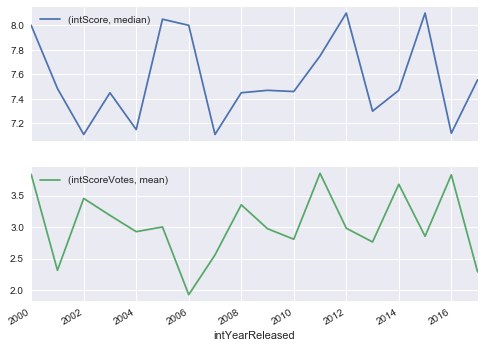

In [84]:
# Subplotting the median intScore and mean intScoreVotes
subplot_df = filtered_year_df.groupby('intYearReleased').agg({'intScore':['median'], 'intScoreVotes':['mean']})
subplot_df.plot(subplots=True, figsize=(8, 6))

### Stacked Bar Graph

First, we group all songs based on the Year released (only after 2000 - we use the filtered dataset containing only years 2000-2017). Then we find out the count of all Genres in each year.<br><br>

Finally, we extract the top 5 Genres using the value_counts and use them for further analysis.<br><br>
We loop over year by year, and count the number of songs for each of the top 5 Genres as a list of values. (We use a dictionary with key : year, values: list containing the count of top 5 genres)

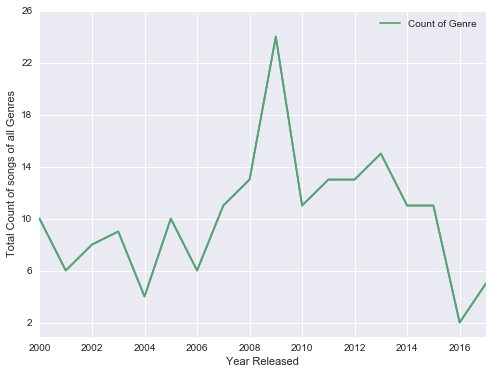

Top 5 genres are :  Pop, Hip-Hop, Metal, Pop-Rock, Alternative Rock

------- Count of albums of each of Top 5 genre per year -------

Year| Pop| Hip-Hop| Metal| Pop-Rock| Alternative Rock
2000|	2       1       2       2       0
2001|	4       0       0       0       1
2002|	4       1       1       1       0
2003|	3       3       2       1       0
2004|	1       1       0       0       0
2005|	6       1       0       1       0
2006|	2       1       0       0       0
2007|	7       0       1       1       0
2008|	2       2       1       2       1
2009|	9       3       3       1       4
2010|	6       2       1       0       0
2011|	8       0       1       1       0
2012|	6       0       2       1       0
2013|	8       5       2       0       0
2014|	5       0       1       2       1
2015|	8       0       0       0       1
2016|	1       0       0       0       0
2017|	3       0       0       0       2


In [85]:
# Aggregate the filtered dataframe by strGenre's count and then plot it to visualise the count of all genres per year
total_count_of_genres = filtered_year_df.groupby('intYearReleased').agg({'strGenre':['count']})
total_count_of_genres.plot(figsize=(8, 6))
p1 = plt.plot(total_count_of_genres)
plt.legend(p1, ["Count of Genre"])
plt.xlabel("Year Released")
plt.ylabel("Total Count of songs of all Genres")
plt.yticks(np.arange(min(total_count_of_genres.values), max(total_count_of_genres.values)+5, 4))
plt.show()

# Find out top 5 most popular Genre in the filtered dataframe
top_5_genre = filtered_year_df.groupby('strGenre').strGenre.value_counts().nlargest(5)
top_5_genre = [top_5_genre.index[i][0] for i in range(0,len(top_5_genre))]
print("Top 5 genres are : ", ", ".join(top_5_genre))

year_to_genre_dict = {}

for i in range(0, len(total_count_of_genres.index.tolist())):
    # 5 counters to count each of top 5 genre's count
    counter_1, counter_2, counter_3, counter_4, counter_5 = 0,0,0,0,0
    year = total_count_of_genres.index.tolist()[i] # get the year
    a = df.loc[df['intYearReleased'] == year]['strGenre'] # extract all genres for that year
    for j in range(0, len(a.values.tolist())):
        # increment counters according to the Genre
        if a.values.tolist()[j] == top_5_genre[0]:
            counter_1 += 1
        elif a.values.tolist()[j] == top_5_genre[1]:
            counter_2 += 1
        elif a.values.tolist()[j] == top_5_genre[2]:
            counter_3 += 1
        elif a.values.tolist()[j] == top_5_genre[3]:
            counter_4 += 1
        elif a.values.tolist()[j] == top_5_genre[4]:
            counter_5 += 1
    year_to_genre_dict[year] = [counter_1, counter_2, counter_3, counter_4, counter_5]
print("\n------- Count of albums of each of Top 5 genre per year -------\n")
print("Year|", "| ".join(top_5_genre))
for key, val in year_to_genre_dict.items():
    print(key, end="|\t")
    print(*val, sep='       ')

Now we plot the stacked bar graph by using the calculated values of list of genres for each year

We sumarise that Pop has again been most famous genre with overall highest number of albums released in the recent years. Next follows Hip-Hop.

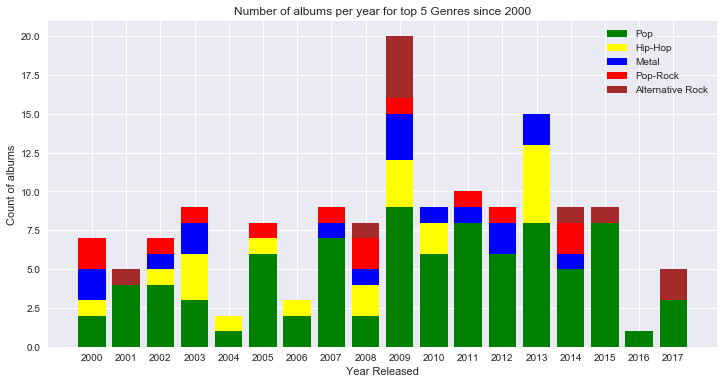

In [86]:
# Plotting a stacked bar chart with 5 colors representing top 5 genres 
cols = ['brown', 'red', 'blue', 'yellow' , 'green']
i = 0
plt.figure(figsize=(12,6))
for key,vals in year_to_genre_dict.items():
    # Manually setting the height of the bar to match the count of albums according to each of 5 genres
    b1 = plt.bar(left=i, height=sum(vals), color=cols[0])
    b2 = plt.bar(left=i, height=sum(vals[:-1]), color=cols[1])
    b3 = plt.bar(left=i, height=sum(vals[:-2]), color=cols[2])
    b4 = plt.bar(left=i, height=sum(vals[:-3]), color=cols[3])
    b5 = plt.bar(left=i, height=vals[0], color=cols[4])
    i = i + 1
plt.title("Number of albums per year for top 5 Genres since 2000")
plt.ylabel("Count of albums")
plt.xlabel("Year Released")
year_list = list(year_to_genre_dict.keys())
plt.xticks(range(len(year_to_genre_dict)), year_list)
# Putting appropriate legends to visualise the genres
plt.legend([b5, b4, b3, b2, b1], [top_5_genre[0], top_5_genre[1], top_5_genre[2], top_5_genre[3], top_5_genre[4]])
plt.show()

We see that stacked bar graph is a good way to visualise the 5 different genres and the number of albums in each genre for a particular year. Overall, Pop music leads the way with highest number of albums and it has an average count of 4.72 albums per year.

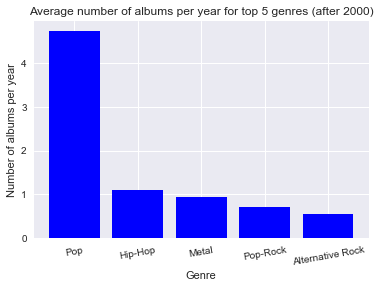

In [87]:
#Plotting a bar graph to show the average number of albums per year for top 5 genres
genre_1, genre_2, genre_3, genre_4, genre_5 = 0,0,0,0,0
for key, val in  year_to_genre_dict.items():
    genre_1 += val[0]
    genre_2 += val[1]
    genre_3 += val[2]
    genre_4 += val[3]
    genre_5 += val[4]
                    
myList = [genre_1, genre_2, genre_3, genre_4, genre_5]
myList[:] = [round((x / len(year_to_genre_dict)), 2) for x in myList]

index = np.arange(len(top_5_genre))
b1 = plt.bar(index, myList, color="blue")
plt.xlabel("Genre")
plt.ylabel("Number of albums per year")
plt.xticks(index, top_5_genre, fontsize=10, rotation=10)
plt.title('Average number of albums per year for top 5 genres (after 2000)')
plt.show()

We infer that Pop stands out to be the most famous music genre with around 4.72 albums per year, whereas its nearest competitor Hip-Hop is almost near 1 album per year.

### Subplot to visualise average Score for each genre across years (after 2000)

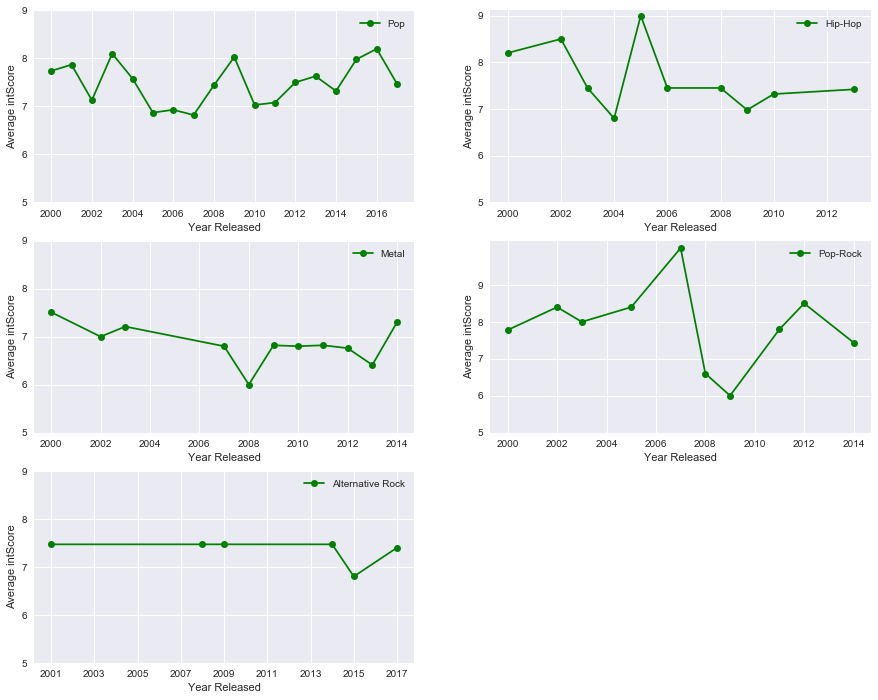

In [88]:
fig = plt.figure(figsize=(15,12))
i = 1 # counter to track the index of subplot
for genre in top_5_genre:
    filtered_genre = filtered_year_df[filtered_year_df['strGenre']==genre]
    a = filtered_genre.groupby('intYearReleased')['intScore']
    mean_intScore_for_year = round(a.mean(),2).tolist()
    year_list = list(a.groups.keys())
    fig.add_subplot(3, 2, i)
    plt.xlabel('Year Released')
    plt.ylabel('Average intScore')
    plt.plot(year_list,mean_intScore_for_year,'o-',label=genre, color="green")
    plt.xticks(np.arange(min(year_list), max(year_list)+1, 2))
    plt.yticks(np.arange(5,10,1))
    plt.legend()
    i +=1

Highest average score occurs for Pop music followed by Hip-Hop, Metal, Pop-Rock and Alternative-Rock.

### Some additional Visualisations

Plot a heatmap (Using seaborn) describing Scores for each Mood of song and Each release format

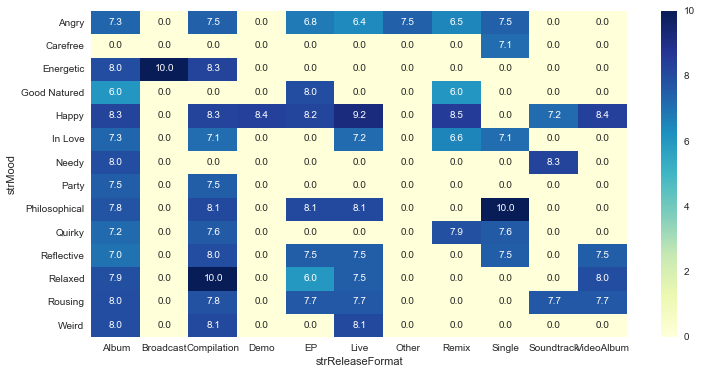

In [89]:
df_heat = df.pivot_table(index='strMood', columns='strReleaseFormat', values='intScore', aggfunc=np.median, fill_value=0)
plt.figure(figsize = (12,6))
sns.heatmap(df_heat, annot=True, fmt=".1f", cmap="YlGnBu")

Album release format has the highest scores across all different song moods with an approximate average(median) score of 7.9. Compilation follows with an average of ~6.8, with Live being next with average score ~5.5. The Demo release format has the least score and only has limited type of song mood. Highest scores among various song mood is present in Happy mood with average score of ~8.3, followed by Reflective with average score ~7.1.

### Final Manipulation, Exploration and Visualisation

We drew a number of visualisations to compare various features in our dataset.<br>
The most important features we used were <b>Artist, Genre, Score, Speed, ScoreVotes, Sales, Year Released.</b><br>


Plot a correlation matrix among all the numeric features in the filtered dataset (After year 2000).

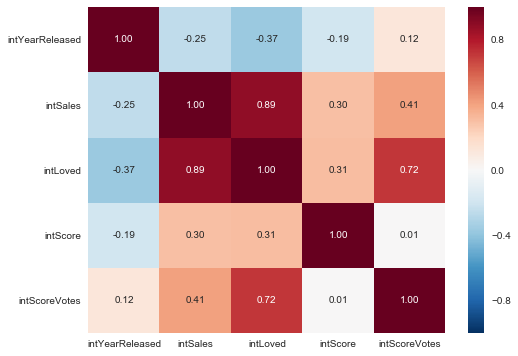

In [90]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")

<span style="color:red">***Final conclusions that can be drawn from the dataset are:***</span><br><br>

<ul>
<li>Our dataset had album details of 16 different artists. We found of the average Score for each artist where Adele leads with 8.36 average score. We also computed total Sales of artist albums and found that Michael Jackson leads with a count of 1.9 hundred million.</li>
<li>We also view that Medium speed songs have the highest average score and it has increased to almost 9 in near 2017. Moreover, by the scatter plot we realised that there is no direct or indirect correlation between Year Released and Sales of an album, and neither between Year and Score.</li>
<li>Top 5 Genres of music after 2000 are: Pop, Hip-Hop, Metal, Pop-Rock, Alternative Rock<br> Even in the entire dataset, Pop music counts almost 42% of the entire songs. We plotted a stacked bar chart for top 5 genres across all years with the number of alumbs in each of them, and realised that Pop again counts almost 40-50% of the songs, with around 4.7 Pop music albums released per year. Hip-hop stands next with average 1.1 albums per year.</li>
<li>On plotting the heatmap between Release format and Song mood (by comparing the scores), we apprehend that Album release format has the highest scores across all different song moods. The Demo release format has the least score and only has limited type of song moods (Happy). Additionally, Happy mood songs have the highest average scores.</li>
<li>Highest correlation is found between Loved rating and Sales (with 0.89 Pearson-R score), and most inversely correlated are Sales and Year Released (-0.25 Pearson-R score), indicating that Year released is quite indirectly correlated with Sales, and the sales of albums has decreased as the years passed on. </li>
<li>Furthermore, other important features like Year released and ScoreVotes are almost independent of each other with no correlation (almost 0.12 Pearson-R score). Sales and Score are also not very strongly positively correlated (Pearson-R score of 0.30)</li>
</ul>

### Tentative Conclusion

Further in-depth studies and tests could be carried out to make statistically significant results, however, there  seems to be a positive relationship between Sales and Loved vote of a song. This is intuitive because an album which has high sales will definitely have higher positive votes in the form of Loved Votes. <br>However, on a general trend total sales is little bit inversely correlated with Year released, and we can approximately predict that total sales might decrease as the years pass by. <br><br>
On the other hand, there is no such correlation between Year and Score, and neither Sales and Year released, which indicates that if an album has high sales, it doesn't necessarily have to be released in the recent years. It instead depends on other factors like Artist or Song mood or Song speed etc. This proves that Year released is not a major deciding factor among the other important criteria like Score, Sales etc.<br><br>
Besides, Pop music has always been the most famous music Genre, with almost 40-50% music albums being Pop music, and it also has highest average Score, and Pop genre also has highest average number of albums per year.